# Final Project

Step 1: Import and preprocess data to suit our task


In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
dforiginal = pd.read_csv(r'/content/drive/MyDrive/ML Final Project/COVID-19_Case_Surveillance_Public_Use_Data.csv')
print(dforiginal)


#TODO: Process this data and extract features (numerical rather than strings ideally)

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        cdc_report_dt pos_spec_dt    onset_dt  ...   icu_yn death_yn medcond_yn
0          2020/06/30         NaN         NaN  ...  Unknown       No    Unknown
1          2020/06/30         NaN         NaN  ...  Unknown       No    Unknown
2          2020/07/05         NaN         NaN  ...  Missing  Missing    Missing
3          2020/06/10         NaN  2020/03/27  ...  Unknown       No    Unknown
4          2020/07/13         NaN  2020/04/20  ...  Unknown       No    Unknown
...               ...         ...         ...  ...      ...      ...        ...
5760061    2020/08/05  2020/06/11         NaN  ...  Missing  Missing        Yes
5760062    2020/06/15  2020/06/11  2020/06/16  ...  Missing  Missing        Yes
5760063    2020/06/11  2020/06/11  2020/06/11  ...       No      Yes        Yes
5760064    2020/06/14  2020/06/11         NaN  ...  Missing  Missing        Yes
5760065    2020/06/11  2020/06/11         NaN  ...  Missing  Missing    Missing

[5760066 rows x 11 columns]


In [2]:
import numpy as np

df = dforiginal
#Preprocess Features
df = df.drop(['cdc_report_dt', 'pos_spec_dt', 'current_status'], axis=1)
df.loc[df['sex'] == 'Male', 'sex'] = 0
df.loc[df['sex'] == 'Female', 'sex'] = 1
df.loc[df['sex'] == 'Other', 'sex'] = 2
df.loc[df['sex'] == 'Unknown', 'sex'] = np.nan
df.loc[df['sex'] == 'Missing', 'sex'] = np.nan
df.loc[df['sex'].isnull(), 'sex'] = np.nan
df.loc[df['onset_dt'].isnull(), 'onset_dt'] = 0
df.loc[df['onset_dt'] != 0, 'onset_dt'] = 1
df['onset_dt'] = df['onset_dt'].astype(float)
df['sex'] = df['sex'].astype(float)

df.loc[df['age_group'] == '0 - 9 Years', 'age_group'] = 0
df.loc[df['age_group'] == '10 - 19 Years', 'age_group'] = 1
df.loc[df['age_group'] == '20 - 29 Years', 'age_group'] = 2
df.loc[df['age_group'] == '30 - 39 Years', 'age_group'] = 3
df.loc[df['age_group'] == '40 - 49 Years', 'age_group'] = 4
df.loc[df['age_group'] == '50 - 59 Years', 'age_group'] = 5
df.loc[df['age_group'] == '60 - 69 Years', 'age_group'] = 6
df.loc[df['age_group'] == '70 - 79 Years', 'age_group'] = 7
df.loc[df['age_group'] == '80+ Years', 'age_group'] = 8
df.loc[df['age_group'] == 'Unknown', 'age_group'] = np.nan
df.loc[df['age_group'].isnull(), 'age_group'] = np.nan
df['age_group'] = df['age_group'].astype(float)

df.loc[df['Race and ethnicity (combined)'] == 'Unknown', 'Race and ethnicity (combined)'] = np.nan
df.loc[df['Race and ethnicity (combined)'].isnull(), 'Race and ethnicity (combined)'] = np.nan
df.loc[df['Race and ethnicity (combined)'] == 'Asian, Non-Hispanic', 'Race and ethnicity (combined)'] = 0
df.loc[df['Race and ethnicity (combined)'] == 'Multiple/Other, Non-Hispanic', 'Race and ethnicity (combined)'] = 1
df.loc[df['Race and ethnicity (combined)'] == 'Black, Non-Hispanic', 'Race and ethnicity (combined)'] = 2
df.loc[df['Race and ethnicity (combined)'] == 'Hispanic/Latino', 'Race and ethnicity (combined)'] = 3
df.loc[df['Race and ethnicity (combined)'] == 'American Indian/Alaska Native, Non-Hispanic', 'Race and ethnicity (combined)'] = 4
df.loc[df['Race and ethnicity (combined)'] == 'Native Hawaiian/Other Pacific Islander, Non-Hispanic', 'Race and ethnicity (combined)'] = 5
df.loc[df['Race and ethnicity (combined)'] == 'White, Non-Hispanic', 'Race and ethnicity (combined)'] = 6
df['Race and ethnicity (combined)'] = df['Race and ethnicity (combined)'].astype(float)

df.loc[df['hosp_yn'] == 'Unknown', 'hosp_yn'] = np.nan
df.loc[df['hosp_yn'] == 'Missing', 'hosp_yn'] = np.nan
df.loc[df['hosp_yn'] == 'Yes', 'hosp_yn'] = 1
df.loc[df['hosp_yn'] == 'No', 'hosp_yn'] = 0
df['hosp_yn'] = df['hosp_yn'].astype(float)

df.loc[df['icu_yn'] == 'Unknown', 'icu_yn'] = np.nan
df.loc[df['icu_yn'] == 'Missing', 'icu_yn'] = np.nan
df.loc[df['icu_yn'] == 'Yes', 'icu_yn'] = 1
df.loc[df['icu_yn'] == 'No', 'icu_yn'] = 0
df['icu_yn'] = df['icu_yn'].astype(float)

df.loc[df['medcond_yn'] == 'Unknown', 'medcond_yn'] = np.nan
df.loc[df['medcond_yn'] == 'Missing', 'medcond_yn'] = np.nan
df.loc[df['medcond_yn'] == 'Yes', 'medcond_yn'] = 1
df.loc[df['medcond_yn'] == 'No', 'medcond_yn'] = 0
df['medcond_yn'] = df['medcond_yn'].astype(float)

df.loc[df['death_yn'] == 'Unknown', 'death_yn'] = -1
df.loc[df['death_yn'] == 'Missing', 'death_yn'] = -1
df.loc[df['death_yn'] == 'Yes', 'death_yn'] = 1
df.loc[df['death_yn'] == 'No', 'death_yn'] = 0
df['death_yn'] = df['death_yn'].astype(int)

df = df[df.death_yn != -1]
print(df)

         onset_dt  sex  age_group  ...  icu_yn  death_yn  medcond_yn
0             0.0  2.0        0.0  ...     NaN         0         NaN
1             0.0  2.0        0.0  ...     NaN         0         NaN
3             1.0  2.0        0.0  ...     NaN         0         NaN
4             1.0  2.0        0.0  ...     NaN         0         NaN
5             1.0  2.0        0.0  ...     NaN         0         NaN
...           ...  ...        ...  ...     ...       ...         ...
5760054       1.0  1.0        7.0  ...     NaN         0         0.0
5760057       1.0  1.0        7.0  ...     0.0         0         NaN
5760058       0.0  1.0        7.0  ...     NaN         0         1.0
5760060       1.0  1.0        7.0  ...     NaN         0         NaN
5760063       1.0  1.0        7.0  ...     0.0         1         1.0

[2821210 rows x 8 columns]


In [3]:
import random

df = df.dropna(axis=0, how='any')
#print(df)
x = df['death_yn'].value_counts(ascending=True)
print(x)
non_death_rows = df.index[df['death_yn'] == 0].tolist()
number_to_drop = x[0] - x[1]
print(number_to_drop)
rows_to_drop = random.sample(non_death_rows, number_to_drop)
df = df.drop(rows_to_drop, axis=0)
print(df)
display(df)

1     27206
0    315059
Name: death_yn, dtype: int64
287853
         onset_dt  sex  age_group  ...  icu_yn  death_yn  medcond_yn
26580         0.0  0.0        0.0  ...     0.0         0         0.0
26612         1.0  0.0        0.0  ...     0.0         0         1.0
26993         1.0  0.0        0.0  ...     0.0         0         1.0
27426         1.0  0.0        0.0  ...     0.0         0         1.0
27517         1.0  0.0        0.0  ...     0.0         0         1.0
...           ...  ...        ...  ...     ...       ...         ...
5759767       0.0  1.0        7.0  ...     0.0         0         1.0
5759858       1.0  0.0        7.0  ...     0.0         1         1.0
5759859       0.0  0.0        7.0  ...     1.0         1         1.0
5759863       1.0  0.0        7.0  ...     0.0         1         1.0
5760063       1.0  1.0        7.0  ...     0.0         1         1.0

[54412 rows x 8 columns]


,onset_dt,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
26580,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0
26612,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0
26993,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0
27426,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0
27517,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...
5759767,0.0,1.0,7.0,2.0,1.0,0.0,0,1.0
5759858,1.0,0.0,7.0,6.0,1.0,0.0,1,1.0
5759859,0.0,0.0,7.0,6.0,1.0,1.0,1,1.0
5759863,1.0,0.0,7.0,6.0,1.0,0.0,1,1.0


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
labels = df['death_yn']
y = labels.to_numpy()
df = df.drop(['death_yn'],axis=1)
X = df.to_numpy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain,ytrain, test_size=0.2)

Step 2: Understand dataset better



In [6]:
#Visualize the class balance/imbalance
print("training")
for i in np.unique(ytrain):
    print(f'{len(ytrain[ytrain==i])} examples of class {i}')
print("validation")
for i in np.unique(yval):
    print(f'{len(yval[yval==i])} examples of class {i}')
print("test")
for i in np.unique(ytest):
    print(f'{len(ytest[ytest==i])} examples of class {i}')

#Summary statistics
import pandas as pd
print(pd.DataFrame(Xtrain).describe(include='all').transpose())

training
17336 examples of class 0
17487 examples of class 1
validation
4463 examples of class 0
4243 examples of class 1
test
5407 examples of class 0
5476 examples of class 1
     count      mean       std  min  25%  50%  75%  max
0  34823.0  0.840020  0.366593  0.0  1.0  1.0  1.0  1.0
1  34823.0  0.478362  0.499539  0.0  0.0  0.0  1.0  1.0
2  34823.0  5.248801  2.237842  0.0  4.0  6.0  7.0  8.0
3  34823.0  4.298079  1.969455  0.0  3.0  6.0  6.0  6.0
4  34823.0  0.521351  0.499551  0.0  0.0  1.0  1.0  1.0
5  34823.0  0.305000  0.460414  0.0  0.0  0.0  1.0  1.0
6  34823.0  0.735778  0.440924  0.0  0.0  1.0  1.0  1.0


Step 3: Train Models

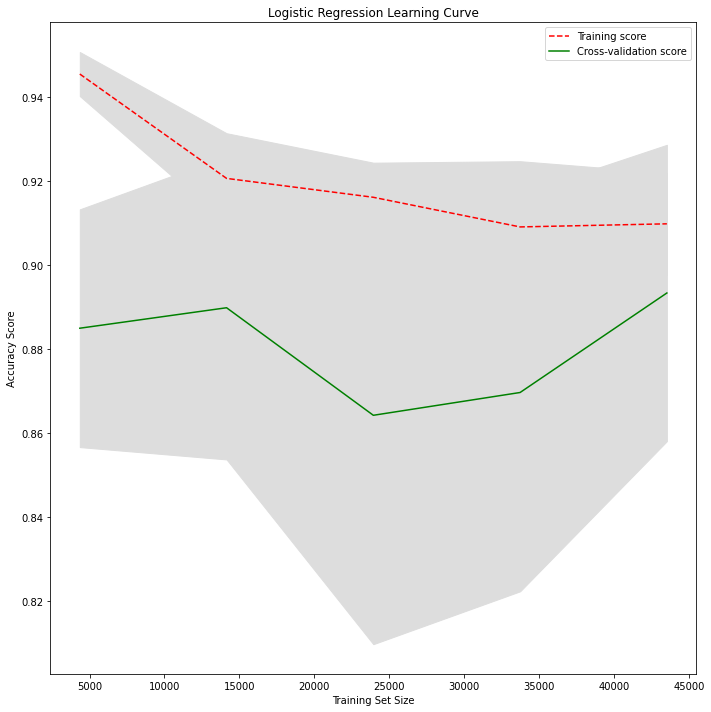

Logistic Regression: 
Accuracy: 0.9099513001929616
F1 Score: 0.9109738372093024
Precision: 0.9000179500987255
Recall: 0.922199742505058



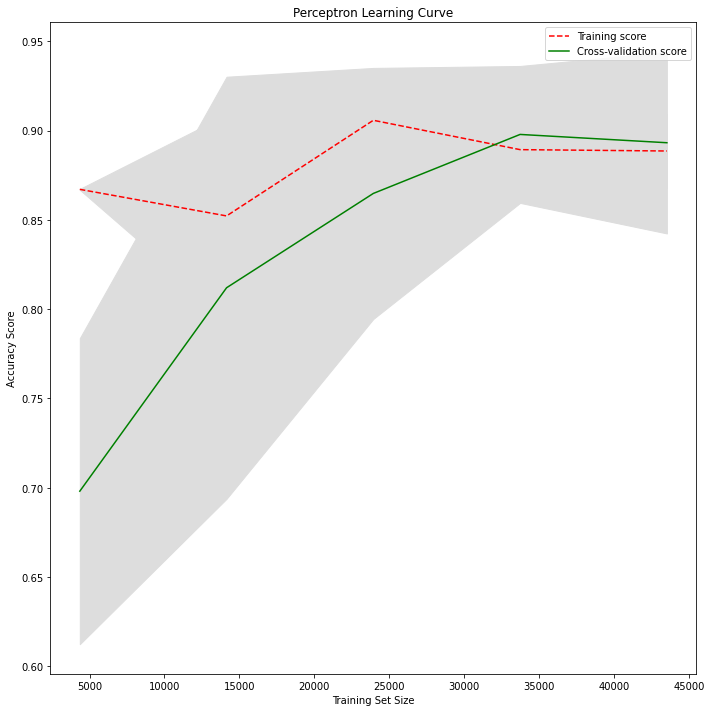

Perceptron: 
Accuracy: 0.9068271616282275
F1 Score: 0.9076670916044436
Precision: 0.8988277727682596
Recall: 0.9166819937465515



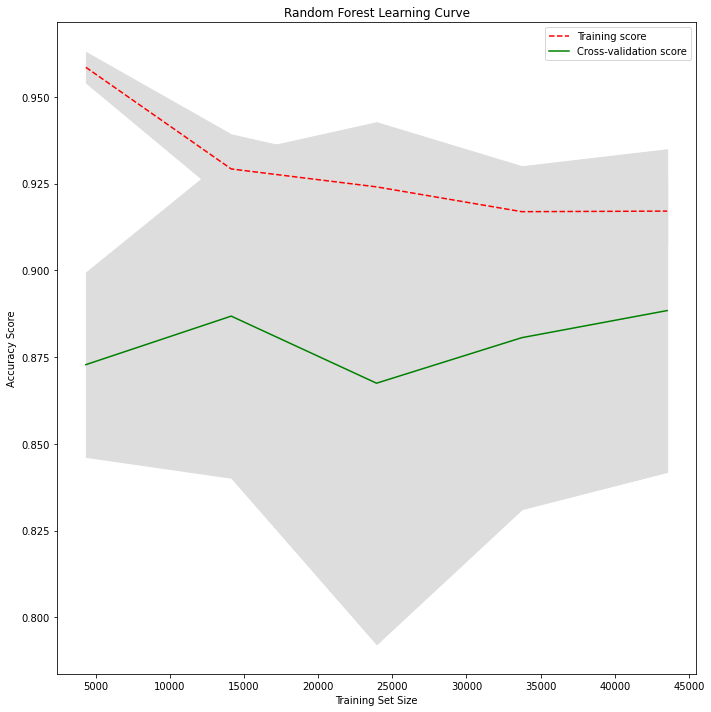

Random Forest: 
Accuracy: 0.9117890287604521
F1 Score: 0.9136224581608782
Precision: 0.894310375198168
Recall: 0.9337870148979216


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import sklearn 
import matplotlib.pyplot as plt

def plot_training_curve(model_type, name):
  train_sizes, train_scores, test_scores = learning_curve(model_type, X, y, cv=5)
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  plt.subplots(1, figsize=(10,10))
  plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
  plt.plot(train_sizes, test_mean, color="g", label="Cross-validation score")

  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

  plt.title(name + " Learning Curve")
  plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()

plot_training_curve(LogisticRegression(), "Logistic Regression")
print("Logistic Regression: ")
logisticModel = LogisticRegression().fit(Xtrain,ytrain)
y_pred = logisticModel.predict(Xtest)
accuracy = logisticModel.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))

print()

plot_training_curve(Perceptron(), "Perceptron")
print("Perceptron: ")
perceptron = Perceptron().fit(Xtrain,ytrain)
y_pred = perceptron.predict(Xtest)
accuracy = perceptron.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))

print()

plot_training_curve(RandomForestClassifier(), "Random Forest")
print("Random Forest: ")
randomForest = RandomForestClassifier().fit(Xtrain,ytrain)
y_pred = randomForest.predict(Xtest)
accuracy = randomForest.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))


Plot ROC Curves to analyze results

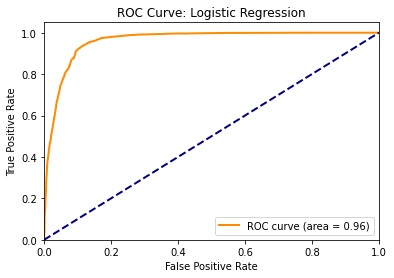

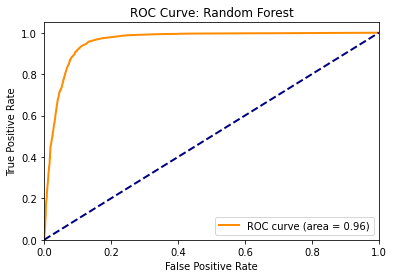

In [ ]:
from sklearn import metrics

def plot_roc_curve(model, name):
  probas_ = model.predict_proba(Xtest)

  # Compute ROC curve and area the curve
  fpr, tpr, thresholds = metrics.roc_curve(ytest, probas_[:, 1])
  roc_auc = metrics.auc(fpr, tpr)

  #Plot the ROC Curve and include AUC in figure. 
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title("ROC Curve: " + name)
  plt.legend(loc="lower right")
  plt.show()

plot_roc_curve(logisticModel, "Logistic Regression")
#Since Perceptron does not output probabilities, we cannot analyze the ROC Curve of the Perceptron
plot_roc_curve(randomForest, "Random Forest")


Step 4: Tune Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'n_estimators': [1, 5, 10, 20, 40, 60, 80, 100],
            'max_depth': [1, 2, 4, 5, 10, 50, None]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(Xval, yval)
best_params = grid_result.best_params_
print(best_params)

gsc = GridSearchCV(
        estimator=Perceptron(),
        param_grid={
            'alpha': [0.00001, 0.0001, 0.001, 0.01],
            'max_iter': [600, 800, 1000, 1200, 1400]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(Xval, yval)
best_params = grid_result.best_params_
print(best_params)

gsc = GridSearchCV(
        estimator=LogisticRegression(),
        param_grid={
            'C': [0.8, 0.9, 1.0, 1.1, 1.2],
            'penalty': ['l1', 'l2', 'none']
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(Xval, yval)
best_params = grid_result.best_params_
print(best_params)


{'max_depth': 5, 'n_estimators': 60}
{'alpha': 1e-05, 'max_iter': 600}
{'C': 0.8, 'penalty': 'l2'}


Now we apply these hyperparameters to our models and assess the new results

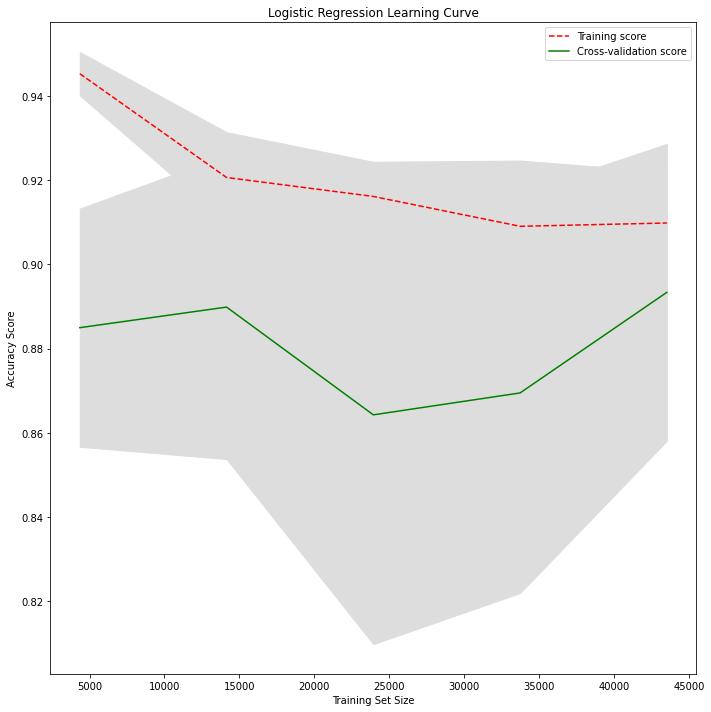

Logistic Regression: 
Accuracy: 0.9099513001929616
F1 Score: 0.9109738372093024
Precision: 0.9000179500987255
Recall: 0.922199742505058



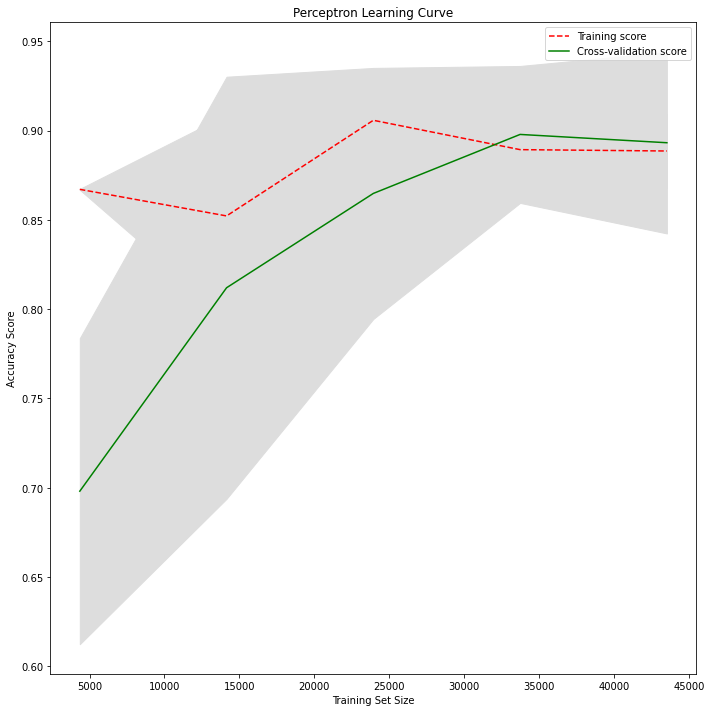

Perceptron: 
Accuracy: 0.9068271616282275
F1 Score: 0.9076670916044436
Precision: 0.8988277727682596
Recall: 0.9166819937465515



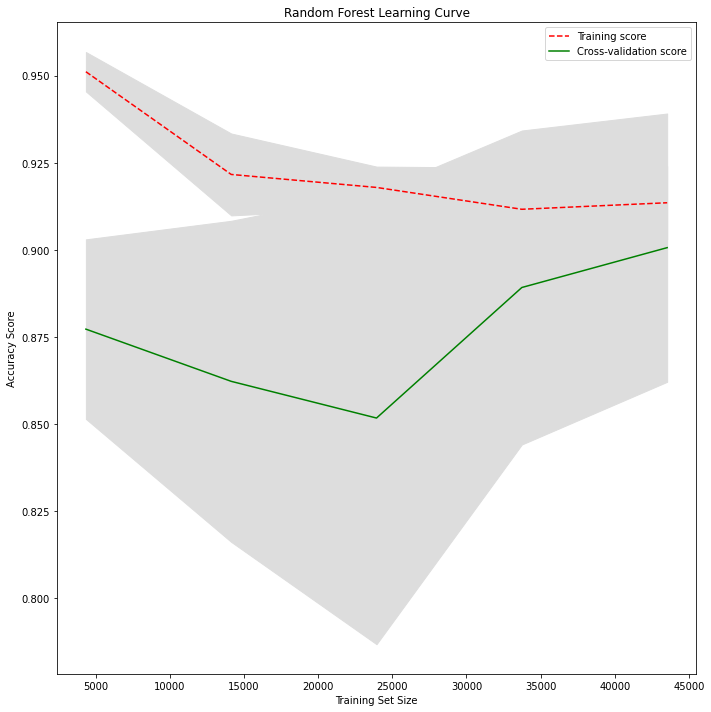

Random Forest: 
Accuracy: 0.9125241201874483
F1 Score: 0.9150758251561105
Precision: 0.8884462151394422
Recall: 0.9433511127459996


In [ ]:
plot_training_curve(LogisticRegression(C=0.8), "Logistic Regression")
print("Logistic Regression: ")
logisticModel = LogisticRegression(C=0.8).fit(Xtrain,ytrain)
y_pred = logisticModel.predict(Xtest)
accuracy = logisticModel.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))

print()

plot_training_curve(Perceptron(alpha=0.00001, max_iter=600), "Perceptron")
print("Perceptron: ")
perceptron = Perceptron(alpha=0.00001, max_iter=600).fit(Xtrain,ytrain)
y_pred = perceptron.predict(Xtest)
accuracy = perceptron.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))

print()

plot_training_curve(RandomForestClassifier(max_depth=5, n_estimators=60), "Random Forest")
print("Random Forest: ")
randomForest = RandomForestClassifier(max_depth=5, n_estimators=60).fit(Xtrain,ytrain)
y_pred = randomForest.predict(Xtest)
accuracy = randomForest.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))